"Margot Wolsink 2009813" 
collaborator: "Anthony van den Berg 2011118"

# Exam R
Mark Klik & Misja Mikkers

# Introduction

The exam consists of 2 parts. In the first part, you have to run a regression, test if the assumptions of a linear regression model are met, and make 2 graphs.

In the second part of the exam, you will have to make a map of Catholic and Protestant schools in the Netherlands.

# Packages


In [328]:
library(tidyverse)
library(gvlma)

# Assignment 1


## Data

The data are given:


In [329]:
set.seed(123)
df1 <- as.data.frame(matrix(runif(1*50, min = 1, max = 10), ncol = 1)) %>%
    mutate(epsilon = rnorm(50, mean = 0, sd = 2)) %>%
    mutate(response = 3 - 2* V1  + epsilon) %>%
    mutate(group = ifelse(V1 <= 5, 1,2))

## Asignment 1a

The first assigment is to make boxplot using ggplot with group on the x-axis and V1 on the y-axis.

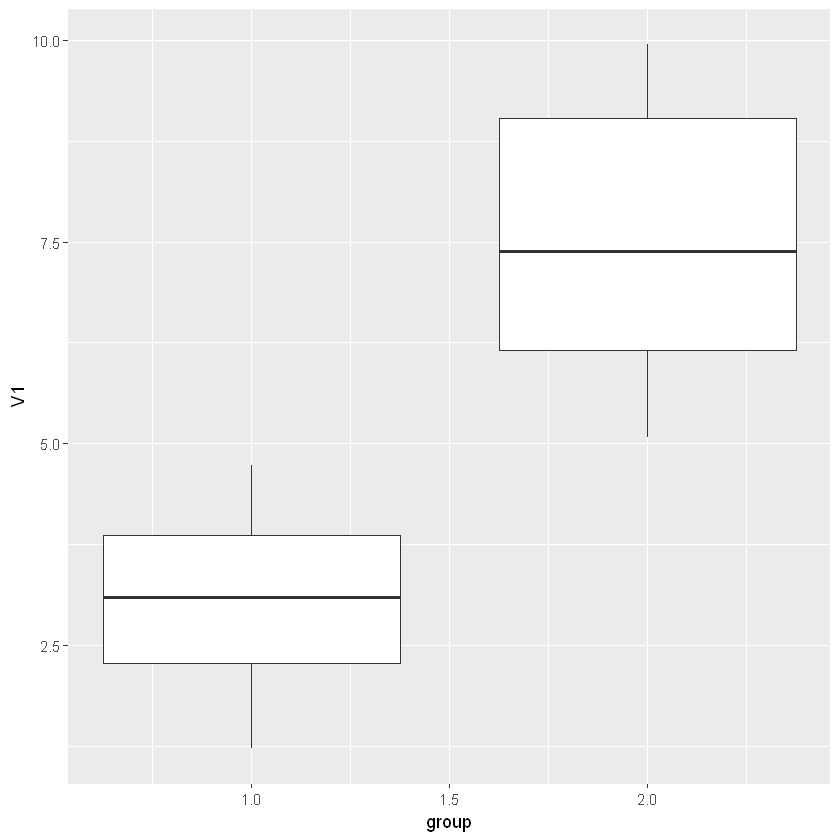

In [330]:
ggplot(df1, aes( x= group, y=V1, group=group)) + geom_boxplot()

We learned in order to make a box plot we use geom_boxplot(),  since it gave an error that group is an continuous value and we should define group= "..."
I decided to do it like this because it gives a better overview.

## Assignment 1b

Run a regression with response variable as a function of V1.
Show the summary statistics of the regression.


In [331]:
reg1 <- regression <- lm(data=df1, response ~ V1)
summary(reg1)


Call:
lm(formula = response ~ V1, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5116 -1.1157 -0.1313  1.0985  4.3723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.6305     0.6347   4.145 0.000138 ***
V1           -1.9152     0.1014 -18.880  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.881 on 48 degrees of freedom
Multiple R-squared:  0.8813,	Adjusted R-squared:  0.8788 
F-statistic: 356.4 on 1 and 48 DF,  p-value: < 2.2e-16


We learned from the tutorial in order to do a regression you must use lm() and define the data in there with response as a function of V1
Then we see the summary of correlation et cetera of the two variables.

check if the assumptions of linear regression are met with the `gvlma()` function.

In [332]:
gvlma(reg1)


Call:
lm(formula = response ~ V1, data = df1)

Coefficients:
(Intercept)           V1  
      2.630       -1.915  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = reg1) 

                      Value p-value                Decision
Global Stat        0.654319  0.9568 Assumptions acceptable.
Skewness           0.002398  0.9609 Assumptions acceptable.
Kurtosis           0.007200  0.9324 Assumptions acceptable.
Link Function      0.005852  0.9390 Assumptions acceptable.
Heteroscedasticity 0.638869  0.4241 Assumptions acceptable.

the gvlma function tells us if all the assumptions in order to have a good regression are met. We have installed it earlier and also used it in the tutorial so we can just use it here again.

## Assignment 1c

Make a scatterplot with: 
* V1 on the x-axis and the response on the y-axis
* Include the regression line in red with confidence interval 
* In a classic theme
* The x-axis should be labeled "Predictor", the y-axis should be labeled ("Response")



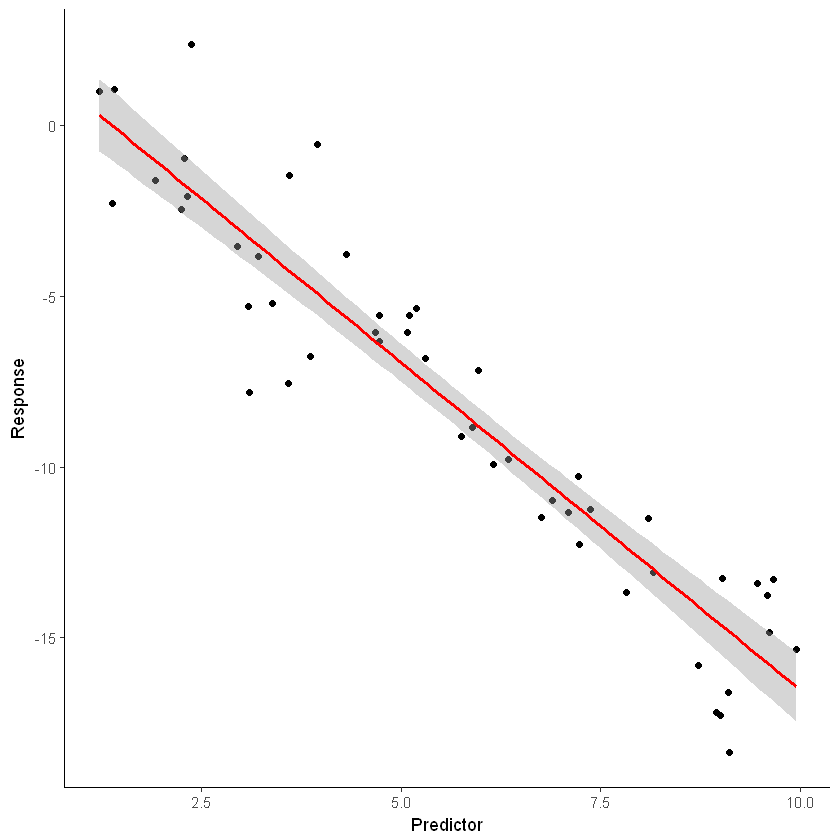

In [333]:
ggplot(data= reg1, aes( x= V1, y= response)) + geom_point() +
geom_smooth( method="lm", se=TRUE, col='red')+
theme_classic()+ xlab("Predictor")+ ylab("Response")

First, we use ggplot to scatterplot the regression. Then we add a regression line and in order to have the confidence interval we must put se="True". The exercise states we must color the line red so we just set col to red. Classic theme and labelling are used too.

# Assigment 2

# Packages

In [334]:
library(thematicmaps)
library(tidyverse)

## Assignment 2a

First you have to read in the file "nld_municipal_map.csv".
Hint: Look at the notebook of week 6 about maps.

In [335]:
map_municipal <- read.csv2("../Sourcedata/nld_municipal_map.csv", stringsAsFactors = FALSE, dec = ".")
head(map_municipal)

name,id,x,y,order,hole,piece,group
Appingedam,0,251260.5,594393.8,1,FALSE,1,0.1
Appingedam,0,251427.8,594486.7,2,FALSE,1,0.1
Appingedam,0,251668.8,594646.8,3,FALSE,1,0.1
Appingedam,0,251713.5,594770.9,4,FALSE,1,0.1
Appingedam,0,251354.6,595461.4,5,FALSE,1,0.1
Appingedam,0,251310.3,596022.5,6,FALSE,1,0.1


We used the read.csv2 function to import the data on municipalities in the Netherlands.

## Assignment 2b

Now you can make an empty map of the Netherlands.

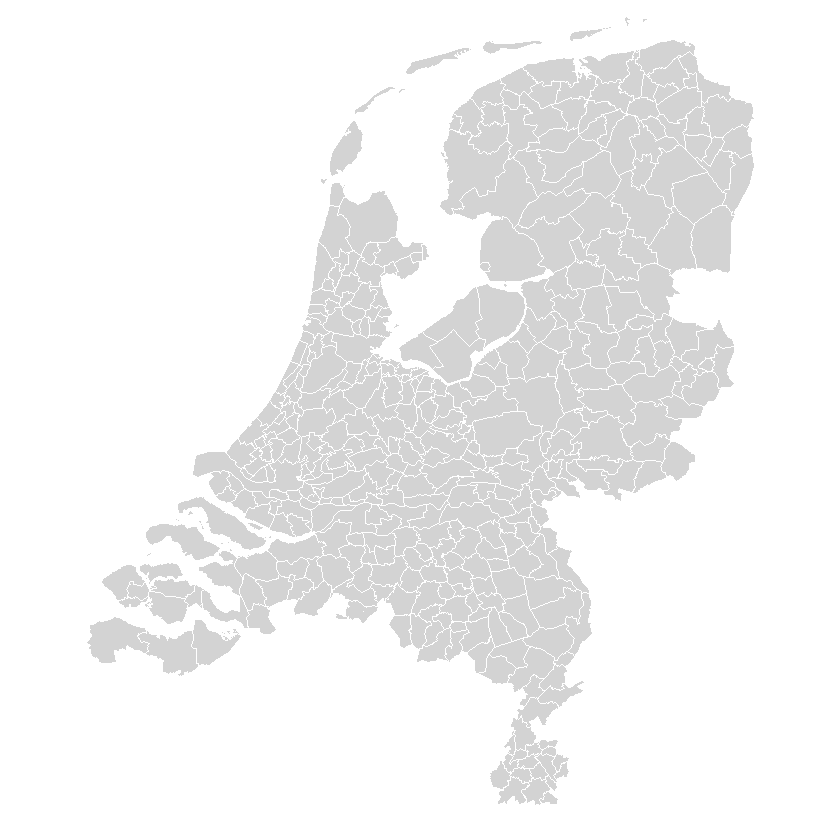

In [336]:
AddMapLayer(MapPlot(), map_municipal)

We use the mapplotting function to plot the Netherlands and the data we use is map municipal

## Assignment 2c

Read in the pc4 locations (nld_pc4_locations.csv).

Hint: Don't forget the X and Y should be numeric variables!

In [337]:
pc4_locations <- pc4_locations <- read.csv2("../Sourcedata/nld_pc4_locations.csv")%>%
  mutate(X = as.numeric(as.character(X))) %>%
   mutate(Y = as.numeric(as.character(Y)))

str(pc4_locations)

'data.frame':	4066 obs. of  3 variables:
 $ PC4: int  1011 1012 1013 1014 1015 1016 1017 1018 1019 1021 ...
 $ X  : num  122244 121613 120325 119515 120740 ...
 $ Y  : num  487223 487555 489672 489422 488009 ...


Now we import postcode locations and make sure we mutate them to numeric otherwise we would get errors later.

## Assignment 2d

### 2di

Read in the school data


In [338]:
schools <- read.csv2("../Sourcedata/schools.csv")

we read the school data from the Netherlands and assign it to schools.

### 2dii

First, create a new dataframe schools1, which is equal to schools.

As you see POSTCODE has a structure of (1234 AB). You should create a new variable PC4 that is equal to the first 4 numbers in POSTCODE

Hint: Use the function `substr()`

Then select the variables PC4 and DENOMINATIE

In [339]:
PC4= substr(schools$POSTCODE, start=0, stop=4) 
PC4= as.numeric(PC4)

In [340]:
schools1 <- schools %>%
    mutate(PC4)

schools1 <- select(schools1, PC4, DENOMINATIE)
names(schools1)

[1] "PC4"         "DENOMINATIE"

we use the substring function on the column postcode and select the first digit to the 4th digit. We also need to set PC4 to numeric because otherwise we again get errors later. Then we mutate the old dataset and add the new column PC4. then we use the select function to select the columns PC4 and DENOMINATIE.

### 2diii

Create the dataframe school_loc as a join from pc4_locations and school1 that combines the columns from both data frames, but only keeps rows where the value in the pc4_locations column matches in both data frames.
And then select the observations with DENOMINATIE is equal to "Rooms-Katholiek" or "Protestants-Christelijk"

We merge the two datasets together with the inner_join function and let them merge on values they share which is PC4. We then assign this merged dataset to school_loc.

In [341]:
school_loc <- inner_join(schools1, pc4_locations, by= "PC4")
school_loc 

PC4,DENOMINATIE,X,Y
9406,Openbaar,231892.2,557973.9
9401,Openbaar,233493.0,556417.8
9402,Openbaar,233609.0,558009.3
9331,Openbaar,227729.6,565502.0
9411,Openbaar,230301.1,541915.0
9461,Openbaar,247920.2,558870.0
9402,Openbaar,233609.0,558009.3
9402,Openbaar,233609.0,558009.3
9403,Openbaar,236027.7,558517.2
9406,Openbaar,231892.2,557973.9


In [342]:
school_loc2 <- subset(school_loc, DENOMINATIE== "Rooms-Katholiek" | DENOMINATIE=="Protestants-Christelijk")
school_loc2

,PC4,DENOMINATIE,X,Y
21,7824,Rooms-Katholiek,258731.5,533917.2
24,7902,Protestants-Christelijk,229332.2,526942.5
25,7903,Protestants-Christelijk,230467.0,527833.3
26,7822,Protestants-Christelijk,257598.1,534933.7
45,9406,Protestants-Christelijk,231892.2,557973.9
46,9405,Protestants-Christelijk,231985.5,554609.9
47,9404,Protestants-Christelijk,235762.2,556213.9
48,9411,Protestants-Christelijk,230301.1,541915.0
49,9422,Protestants-Christelijk,226773.0,551209.3
50,7944,Protestants-Christelijk,208812.5,522321.5


Then using the subset function we select rows where denominatie is equal to Rooms-Katholiek and Christelijk Protestants.

## Assignment 2e

Create a map of Catholic and Protestant schools in the Netherlands


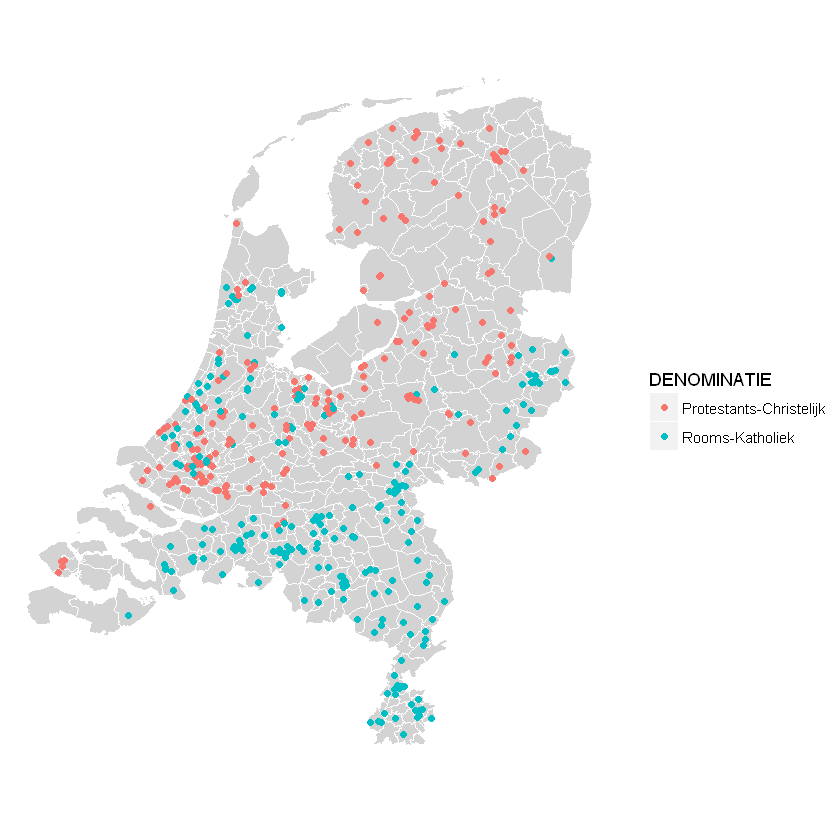

In [343]:
AddMapLayer(MapPlot(),map_municipal) %>%
AddPointsLayer(school_loc2, columnNameColor="DENOMINATIE")

We plot the map of the Netherlands in the same way as before and now add a layer of points to show where these schools are. We base the color on the Rooms-Katholiek and Protestants-Christelijk.

End of notebook